<a href="https://colab.research.google.com/github/BautistaDavid/Proyectos_ClaseML/blob/corte_1/proyecto_3_icfes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto 3 - Manejo datos Icfes**

La idea del proyecto es la creacion de un objeto que permita interactuar con unos registros que estan en tuplas dentro de una tupla previamente construidas con un archivo .txt con datos sobre el examen del icfes para el año 2020. 

#### **Manejo del archivo .txt** 

Se usan los metodos ```open()``` y ```read()``` para poder iterar sobre el archivo .txt, de modo que usando bucles y la funcion split() se cree una tupla por registro y el conjunto de todos estos se agrupen en otra tupla.  



In [4]:
datos_icfes = open("SaberPro_Genéricas_2020.txt","r",encoding = "utf-8")
datos = [tuple(i.split("¬")) for i in datos_icfes.read().split("\n")]
datos.pop()   # Usamos el.pop() para evitar un erro de indice un metodo que navegue por la columnas de los datos
datos = tuple(datos)
#Imprimamos algunos datos de nuestro primer registro, solo para visualizar la estructura en tuplas.  
datos[0][1::10]

('ESTU_NACIONALIDAD',
 'ESTU_MCPIO_RESIDE',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_TIPODOCUMENTOSB11',
 'FAMI_TIENELAVADORA',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_INST_MUNICIPIO',
 'MOD_RAZONA_CUANTITAT_DESEM',
 'MOD_COMPETEN_CIUDADA_PNBC',
 'PERCENTIL_NBC')

### **Creación del objeto**

El objeto contara con 4 metodos princiaples, ```registro()```,```columna()```,```filtrar()```, ```summary_col()```. 




In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns

class interactuar(object):
  def __init__(self, datos):
    self.datos = datos
  
  def registro(self, regis:int) -> tuple:
    """
    regis : Numero del registro que se quiere acceder 
    """
    return self.datos[regis]

  def columna(self, col:str) -> list:
    """
    col: Nombre de la columna a la que se quiere acceder. 
    """
    return [i[self.datos[0].index(col)] for i in self.datos]

  def filtrar(self,condicion:str,col:str):
    """
    col: Nombre de la columna a la que se quiere acceder.
    condicion: se debe ingresar una condicion numerica usando la palabra "variable".
              ejemplo: variable>10 
    """
    return list(filter(lambda variable:eval(condicion),[int(i) for i in self.columna(col)[1:]]))
  
  def summary_col(self, col:str,plot=False):
    self.__array = [int(i) for i in self.columna(col)[1:]]
    self.__media = sum(self.__array)/len(self.__array)
    self.__varianza = sum([(i - self.__media)**2 for i in self.__array])/len(self.__array) 
    self.__desv = self.__varianza**(1/2)
    self.__mediana = np.median(self.__array)
    sns.distplot(self.__array) if plot==True else None
    print(" ")

    return print(f"Media: {self.__media}\nVarianza: {self.__varianza}\nDesviación.E: {self.__desv}\nMediana: {self.__mediana}")


### **Testeo de metodos del objeto** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 
Media: 148.42373074729036
Varianza: 723.6646051345753
Desviación.E: 26.901014946179544
Mediana: 148.0


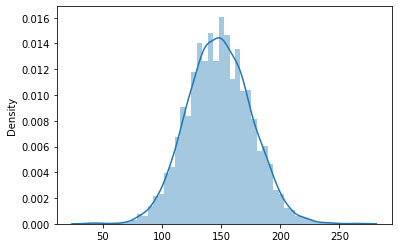

In [47]:
import numpy as np
interact = interactuar(datos)
interact.summary_col("PUNT_GLOBAL",plot=True)   # el argumento plot da la opcion de desplegar una grafica de distribución sobre los datos 

In [44]:
interact.filtrar("variable>230",col="PUNT_GLOBAL")

[234,
 263,
 247,
 243,
 263,
 237,
 253,
 240,
 237,
 268,
 232,
 242,
 241,
 232,
 241,
 236]

In [48]:
interact.summary_col("PERCENTIL_GLOBAL")

 
Media: 49.533257273245866
Varianza: 861.5340051916539
Desviación.E: 29.351899515902783
Mediana: 49.0


In [57]:
interact.filtrar("variable>99 and variable<105",col="PUNT_GLOBAL")

[101,
 100,
 100,
 104,
 101,
 104,
 100,
 101,
 101,
 103,
 103,
 102,
 104,
 102,
 100,
 101,
 102,
 102,
 104,
 104,
 101,
 102,
 104,
 100,
 104,
 102,
 100,
 103,
 101,
 104,
 102,
 104,
 102,
 103,
 101,
 104,
 100,
 100,
 104,
 100,
 101,
 102,
 102,
 104,
 101,
 101,
 101,
 103,
 103,
 102,
 100,
 104,
 102,
 101,
 101,
 104,
 101,
 102,
 104,
 104,
 103,
 102,
 103,
 104,
 100,
 101,
 100,
 100,
 104,
 103,
 104,
 104,
 100,
 101,
 103,
 101,
 104,
 101,
 104,
 100,
 100,
 102,
 103,
 103,
 102,
 102,
 103,
 102,
 101,
 103,
 101,
 100,
 101,
 101,
 104,
 104,
 103,
 101,
 103,
 104,
 104,
 101,
 101,
 102,
 100,
 104,
 100,
 102,
 104,
 100,
 104,
 104,
 103,
 100,
 103,
 104,
 103,
 100,
 100,
 101,
 104,
 102,
 102,
 104,
 102,
 100,
 102,
 103,
 101,
 103,
 101,
 103,
 103,
 104,
 102]